In [1]:
import math

import pandas as pd
import numpy as np


detect_df = pd.read_csv('../detector_stats.csv')
print(detect_df.columns.values)
agg_detect_df = detect_df.groupby(['detector']).agg({'num_keypoints': np.mean, 
                                                     'neighb_size_mean': np.mean,
                                                    'neighb_size_var': np.mean})
print(agg_detect_df)

['detector' 'num_keypoints' 'neighb_size_mean' 'neighb_size_var'
 'image_num']
           num_keypoints  neighb_size_mean  neighb_size_var
detector                                                   
AKAZE              167.0          7.693413         12.48961
BRISK              276.2         21.942220        213.27720
FAST               409.4          7.000000          0.00000
HARRIS              56.0          4.000000          0.00000
ORB                116.1         56.057770        632.26310
SHITOMASI          117.9          4.000000          0.00000
SIFT               138.6          5.032345         35.64431


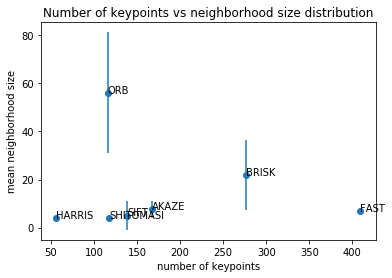

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x=agg_detect_df['num_keypoints'], y=agg_detect_df['neighb_size_mean'])
plt.xlabel('number of keypoints')
plt.ylabel('mean neighborhood size')
plt.errorbar(agg_detect_df['num_keypoints'],
             agg_detect_df['neighb_size_mean'],
             yerr=agg_detect_df['neighb_size_var'].apply(math.sqrt), linestyle="None")
plt.title("Number of keypoints vs neighborhood size distribution")

for detector in agg_detect_df.index:
    plt.annotate(detector, 
                 (agg_detect_df['num_keypoints'][detector],agg_detect_df['neighb_size_mean'][detector]))

['detector' 'descriptor' 'detector_time' 'descriptor_time' 'num_matches'
 'image_num']


Text(0.5,1,'Performance of detector/descriptor combinations')

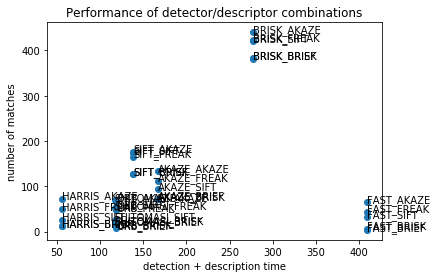

In [5]:

match_df = pd.read_csv('../matcher_stats.csv')
print(match_df.columns.values)
agg_match_df = match_df.groupby(['detector', 'descriptor'], as_index=False).agg({'num_matches': np.mean, 
                                                     'detector_time': np.mean,
                                                     'descriptor_time': np.mean})
t = agg_match_df['detector_time'] + agg_match_df['descriptor_time']
conc = agg_match_df.apply(lambda x: f"{x['detector']}_{x['descriptor']}", axis=1)

plt.scatter(agg_match_df['num_matches'], t)
plt.ylabel('number of matches')
plt.xlabel('detection + description time')
for i, (x, y) in enumerate(zip(agg_match_df['num_matches'], t)):
    plt.annotate(conc[i], (x,y))
plt.title("Performance of detector/descriptor combinations")